## Exploratory Data Analysis

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/fraudTrain.csv')

In [3]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
df.shape

(1296675, 23)

In [5]:
df1 = pd.read_csv('data/fraudTest.csv')

In [6]:
df1.shape

(555719, 23)

In [7]:
data = pd.concat([df,df1])

In [8]:
data.shape

(1852394, 23)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
fraud_by_cat=data.groupby('category').is_fraud.sum().sort_values()
fraud_by_cat

category
travel             156
grocery_net        175
health_fitness     185
food_dining        205
home               265
personal_care      290
entertainment      292
kids_pets          304
misc_pos           322
gas_transport      772
shopping_pos      1056
misc_net          1182
shopping_net      2219
grocery_pos       2228
Name: is_fraud, dtype: int64

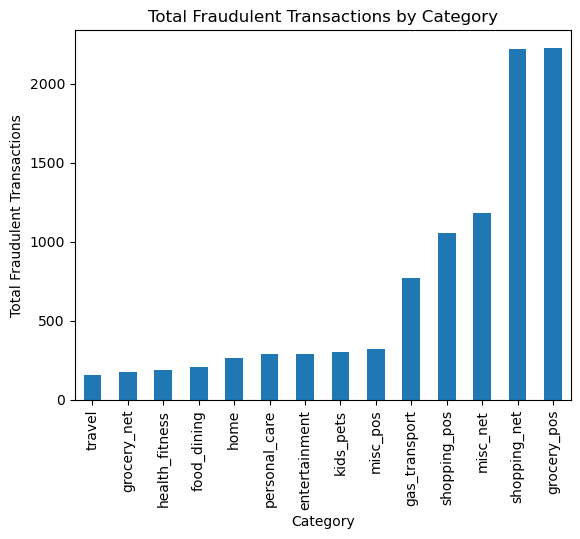

In [11]:
fraud_by_cat.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Total Fraudulent Transactions')
plt.title('Total Fraudulent Transactions by Category')

plt.show()

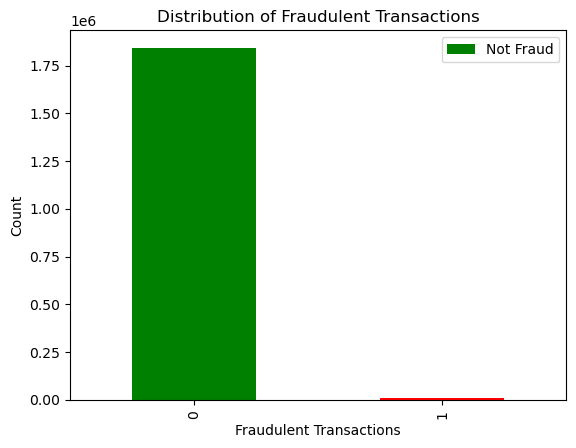

In [12]:
data['is_fraud'].value_counts().plot(kind='bar', color=['green', 'red'])

# Adding labels and title
plt.xlabel('Fraudulent Transactions')
plt.ylabel('Count')
plt.title('Distribution of Fraudulent Transactions')

# Adding legend
plt.legend(labels=['Not Fraud', 'Fraud'])

# Display the plot
plt.show()

In [13]:
data['is_fraud'].value_counts()

is_fraud
0    1842743
1       9651
Name: count, dtype: int64

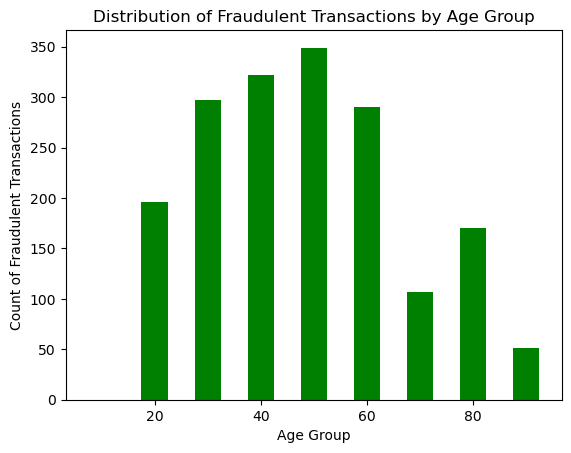

In [14]:
age_groups = [10, 20, 30, 40, 50, 60, 70, 80, 90]
fraud_counts = [0, 196, 297, 322, 349, 290, 107, 170, 51]


plt.bar(age_groups, fraud_counts, color='green', alpha=1, width=5)

# Adding labels and title
plt.xlabel('Age Group')
plt.ylabel('Count of Fraudulent Transactions')
plt.title('Distribution of Fraudulent Transactions by Age Group')

# Display the plot
plt.show()

In [15]:
non_fraudulent_sample = data[data['is_fraud'] == 0].sample(n=100000, random_state=42)

# Select all fraudulent cases (is_fraud=1)
fraudulent_cases = data[data['is_fraud'] == 1]

# Concatenate the two DataFrames to create a new DataFrame
fraud_df = pd.concat([non_fraudulent_sample, fraudulent_cases])

# Shuffle the new DataFrame to randomize the order
fraud_df = fraud_df.sample(frac=1, random_state=42).reset_index(drop=True)


## Data Preprocessing

In [16]:
# fraud_df = fraud_df.drop(fraud_df.columns[0], axis=1)

columns = fraud_df.columns
fraud_df = fraud_df.rename(columns={columns[0]: 'ID'})

In [17]:
fraud_df.head()

,ID,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,690420,2019-10-21 11:53:47,4355790796238264643,"fraud_Lockman, West and Runte",grocery_pos,105.52,Tanner,Davis,M,2632 Stevens Light Apt. 213,...,39.8153,-91.2627,1656,Exhibition designer,1969-08-04,2fdc68c8061141cb78be19d8fc4003fc,1350820427,40.419634,-91.411194,0
1,782437,2019-11-30 19:05:59,4653879239169997,fraud_Kilback LLC,food_dining,9.64,Monica,Tucker,F,302 Christina Islands,...,37.0581,-86.1938,6841,"Therapist, sports",1999-06-06,8f6dc51db9731b698c9f4485e3562b54,1354302359,36.109053,-86.720516,0
2,376913,2020-11-15 14:25:08,180084576295055,fraud_Bauch-Blanda,entertainment,29.07,David,Kirby,M,133 Alyssa Plains,...,28.7724,-96.4793,911,Archaeologist,1970-01-18,656ea91fb78f4b1a32bad8fe1f2e37ad,1384525508,27.780075,-95.998269,0
3,832772,2019-12-11 15:53:23,4727244663135968,"fraud_Schiller, Blanda and Johnson",home,7.77,Mary,Lewis,F,118 Justin Extension,...,30.8635,-87.7644,19090,Science writer,1929-05-30,e2987c1e252c3c9eae891c213f213078,1355241203,31.524994,-87.599429,0
4,1062834,2020-03-17 00:43:42,5289285402893489,fraud_Lesch Ltd,shopping_pos,965.83,Amanda,Adams,F,08580 Jeremy Falls,...,45.5197,-123.8761,1530,Colour technologist,1986-11-24,2c7105b75b6bb4c47c033adbd8bf28e7,1363481022,46.035785,-123.399278,1


In [17]:
columns_to_drop = ['cc_num', 'first', 'last', 'gender', 'street', 'zip', 'unix_time']
fraud_df = fraud_df.drop(columns=columns_to_drop)
fraud_df.columns

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'city', 'state',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [18]:
columns_to_drop = ['trans_date_trans_time', 'dob', 'trans_num']
fraud_df = fraud_df.drop(columns=columns_to_drop)
fraud_df.head()

,merchant,category,amt,city,state,lat,long,city_pop,job,merch_lat,merch_long,is_fraud
0,fraud_Smitham-Schiller,grocery_net,48.03,Wilmette,IL,42.0765,-87.7246,27020,Trade mark attorney,41.426356,-88.663574,0
1,fraud_Dickinson-Rempel,misc_pos,33.98,Brownville,NY,44.0577,-76.0196,1271,"Producer, radio",43.192549,-76.379399,0
2,fraud_Stark-Koss,home,102.33,New Holstein,WI,43.9446,-88.0911,5196,Child psychotherapist,43.750039,-89.034637,0
3,"fraud_Stehr, Jewess and Schimmel",misc_net,249.72,Battle Creek,IA,42.3327,-95.6045,1075,"Teacher, early years/pre",43.243656,-96.429081,0
4,fraud_Morissette PLC,shopping_pos,5.66,Tryon,OK,35.8759,-96.9623,1165,"Psychotherapist, child",35.498601,-96.299878,0


In [44]:
fraud_df.columns

,ID,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0.745181,0.458493,0.033066,0.845376,0.230769,0.002066,0.240113,0.459794,1.0,0.040080,...,0.472492,0.797647,0.789888,0.965726,0.769074,0.570947,0.458493,0.461023,0.782243,0.0
1,0.414702,0.215341,0.593186,0.197977,0.692308,0.001449,0.912429,0.973196,0.0,0.582164,...,0.514947,0.917426,0.311236,0.717742,0.255341,0.673127,0.215341,0.497519,0.905470,0.0
2,0.728107,0.441569,0.177355,0.861272,0.461538,0.004451,0.661017,0.494845,1.0,0.728457,...,0.512523,0.793897,0.595506,0.163306,0.625636,0.570444,0.441569,0.509038,0.778521,0.0
3,0.059686,0.032508,0.624248,0.862717,0.615385,0.010925,0.556497,0.430928,0.0,0.023046,...,0.477982,0.717012,0.278652,0.913306,0.937945,0.955591,0.032508,0.498575,0.704344,0.0
4,0.528743,0.272624,0.791583,0.632948,0.923077,0.000205,0.494350,0.754639,1.0,0.115230,...,0.339621,0.703117,0.295506,0.758065,0.105799,0.497133,0.272624,0.338537,0.705640,0.0


In [18]:
fraud_dff = fraud_df.copy()

In [ ]:
# One-hot encode categorical variables
encoded_df = pd.get_dummies(fraud_df, columns=['trans_date_trans_time','dob','first', 'last', 'gender', 'street', 'zip','merchant', 'category', 'city','state','city_pop','job'])

encoded_df.head()

In [20]:
encoded_df = fraud_df.copy()

In [21]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in ['ID', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',]:
    encoded_df[col] = label_encoder.fit_transform(encoded_df[col])

encoded_df.head()

,ID,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,71809,41280,938,395,4,105.52,322,102,1,262,...,39.8153,-91.2627,331,188,454,20645,41280,40.419634,-91.411194,0
1,77142,46608,749,316,1,9.64,252,433,0,312,...,37.0581,-86.1938,579,473,952,61595,46608,36.109053,-86.720516,0
2,43842,99406,271,28,0,29.07,94,234,1,129,...,28.7724,-96.4793,228,30,468,43602,99406,27.780075,-95.998269,0
3,80081,49543,765,552,6,7.77,233,249,0,111,...,30.8635,-87.7644,677,408,20,97224,49543,31.524994,-87.599429,0
4,93908,63353,812,387,12,965.83,10,1,0,84,...,45.5197,-123.8761,315,92,761,19199,63353,46.035785,-123.399278,1


In [22]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Apply Min-Max scaling to each numerical column
encoded_df[['ID', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long']] = scaler.fit_transform(encoded_df[['ID', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long']])
encoded_df.head()

,ID,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0.666163,0.376880,0.939880,0.570809,0.307692,0.004591,0.909605,0.210309,1.0,0.262525,...,0.424037,0.761442,0.371910,0.379032,0.461851,0.188281,0.376880,0.441127,0.754681,0
1,0.715636,0.425523,0.750501,0.456647,0.076923,0.000379,0.711864,0.892784,0.0,0.312625,...,0.364954,0.813312,0.650562,0.953629,0.968464,0.561742,0.425523,0.352200,0.801735,0
2,0.406716,0.907560,0.271543,0.040462,0.000000,0.001233,0.265537,0.482474,1.0,0.129259,...,0.187401,0.708060,0.256180,0.060484,0.476094,0.397647,0.907560,0.180375,0.708666,0
3,0.742901,0.452319,0.766533,0.797688,0.461538,0.000297,0.658192,0.513402,0.0,0.111222,...,0.232211,0.797240,0.760674,0.822581,0.020346,0.886676,0.452319,0.257632,0.792918,0
4,0.871172,0.578402,0.813627,0.559249,0.923077,0.042378,0.028249,0.002062,0.0,0.084168,...,0.546275,0.427705,0.353933,0.185484,0.774161,0.175093,0.578402,0.556986,0.433796,1


Lasso selected features:
category    0.010481
dtype: float64


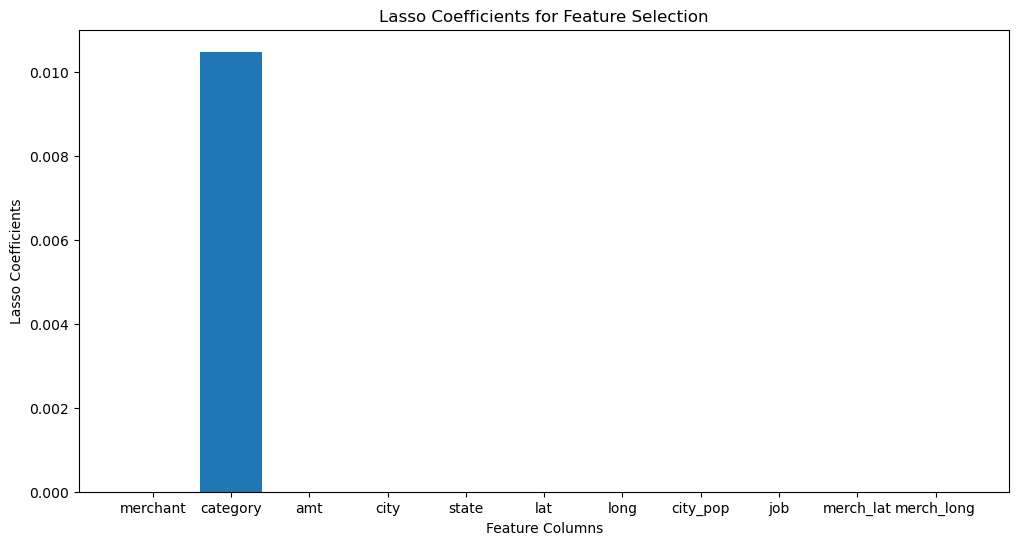

In [24]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split


# Split the data into features and target variable
y = encoded_df['is_fraud']
X = encoded_df.drop('is_fraud', axis=1) 


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Lasso model
lasso_model = Lasso(alpha=0.01)

# Fit the model on the training data
lasso_model.fit(X_train, y_train)

# Print the coefficients of the features
feature_coefficients = pd.Series(lasso_model.coef_, index=X.columns)
print("Lasso selected features:")
print(feature_coefficients[feature_coefficients != 0])

# Visualize the coefficients
plt.figure(figsize=(12, 6))  # Adjust the width and height as needed
plt.bar(X.columns, lasso_model.coef_)
plt.xlabel('Feature Columns')
plt.ylabel('Lasso Coefficients')
plt.title('Lasso Coefficients for Feature Selection')
plt.show()


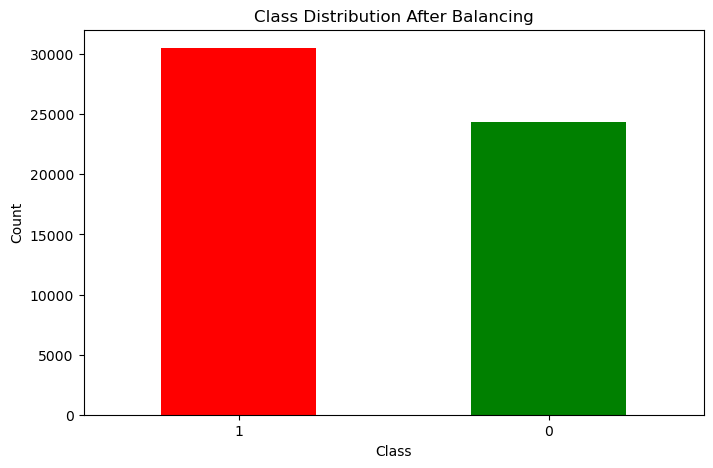

In [28]:
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
y = encoded_df['is_fraud']
X = encoded_df.drop('is_fraud', axis=1) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE-ENN to balance the classes
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)


plt.figure(figsize=(8, 5))
y_resampled.value_counts().plot(kind='bar', color=['red', 'green'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution After Balancing')
plt.xticks(rotation=0) 
plt.show()


In [29]:
X_resampled.head()

,merchant,category,amt,city,state,lat,long,city_pop,job,merch_lat,merch_long
0,0.213873,0.461538,0.004088,0.877348,0.86,0.315359,0.646384,0.008989,0.401210,0.343263,0.638885
1,0.658960,0.461538,0.000309,0.525967,0.40,0.421024,0.908477,0.712360,0.181452,0.420849,0.894553
2,0.325145,0.692308,0.000129,0.836464,0.56,0.560506,0.659149,0.019101,0.391129,0.577104,0.647916
3,0.492775,0.923077,0.000253,0.718232,0.76,0.428786,0.927180,0.994382,0.883065,0.442821,0.913523
4,0.848266,0.692308,0.001116,0.798895,0.86,0.277228,0.706812,0.768539,0.854839,0.268437,0.710089


## Individual Classifiers

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
# Instantiate classifiers
classifiers = {
    'XGBoost': XGBClassifier(),
    'LGBM': LGBMClassifier(),
    'Decision Trees': DecisionTreeClassifier(),
    'Neural Networks': MLPClassifier(),
    'Random Forests': RandomForestClassifier(),
    'SVM': SVC(probability=True), 
    'AdaBoost': AdaBoostClassifier()
}
# Initialize metrics dictionaries
accuracy_dict = {}
precision_dict = {}
recall_dict = {}
f1_dict = {}
roc_auc_dict = {}
conf_matrix_dict = {}
# Train and evaluate each classifier
for name, clf in classifiers.items():
    # Train the model
    clf.fit(X_train, y_train)
    # Make predictions
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:, 1]
    # Calculate metrics
    accuracy_dict[name] = accuracy_score(y_test, y_pred)
    precision_dict[name] = precision_score(y_test, y_pred)
    recall_dict[name] = recall_score(y_test, y_pred)
    f1_dict[name] = f1_score(y_test, y_pred)
    roc_auc_dict[name] = roc_auc_score(y_test, y_prob)
    conf_matrix_dict[name] = confusion_matrix(y_test, y_pred)
# Print evaluation metrics
print("Evaluation Metrics:")
for name in classifiers.keys():
    print(f"\nMetrics for {name}:")
    print(f"Accuracy: {accuracy_dict[name]:.4f}")
    print(f"Precision: {precision_dict[name]:.4f}")
    print(f"Recall: {recall_dict[name]:.4f}")
    print(f"F1 Score: {f1_dict[name]:.4f}")
    print(f"AUROC: {roc_auc_dict[name]:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix_dict[name]}")

## Hybrid Model

In [34]:
from sklearn.ensemble import VotingClassifier

# Assuming 'X_train', 'X_test', 'y_train', 'y_test' are your train-test split data
# Assuming 'lgbm_base' is your LGBM base model trained on the resampled data

# Instantiate classifiers for the ensemble models
xgboost_clf = XGBClassifier()
decision_tree_clf = DecisionTreeClassifier()
neural_network_clf = MLPClassifier()
random_forest_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)
adaboost_clf = AdaBoostClassifier()

# Create ensemble models
ensemble_models = [
    ('LGBM + XGBoost', VotingClassifier([('lgbm', lgbm_base), ('xgboost', xgboost_clf)], voting='soft')),
    ('LGBM + Decision Trees', VotingClassifier([('lgbm', lgbm_base), ('decision_tree', decision_tree_clf)], voting='soft')),
    ('LGBM + Neural Networks', VotingClassifier([('lgbm', lgbm_base), ('neural_network', neural_network_clf)], voting='soft')),
    ('LGBM + Random Forests', VotingClassifier([('lgbm', lgbm_base), ('random_forest', random_forest_clf)], voting='soft')),
    ('LGBM + SVM', VotingClassifier([('lgbm', lgbm_base), ('svm', svm_clf)], voting='soft')),
    ('LGBM + AdaBoost', VotingClassifier([('lgbm', lgbm_base), ('adaboost', adaboost_clf)], voting='soft')),
]

# Initialize metrics dictionaries for ensemble models
accuracy_ensemble_dict = {}
precision_ensemble_dict = {}
recall_ensemble_dict = {}
f1_ensemble_dict = {}
roc_auc_ensemble_dict = {}
conf_matrix_ensemble_dict = {}

# Train and evaluate each ensemble model
for name, model in ensemble_models:
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred_ensemble = model.predict(X_test)
    y_prob_ensemble = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    accuracy_ensemble_dict[name] = accuracy_score(y_test, y_pred_ensemble)
    precision_ensemble_dict[name] = precision_score(y_test, y_pred_ensemble)
    recall_ensemble_dict[name] = recall_score(y_test, y_pred_ensemble)
    f1_ensemble_dict[name] = f1_score(y_test, y_pred_ensemble)
    roc_auc_ensemble_dict[name] = roc_auc_score(y_test, y_prob_ensemble)
    conf_matrix_ensemble_dict[name] = confusion_matrix(y_test, y_pred_ensemble)

# Print evaluation metrics for ensemble models
print("Evaluation Metrics for Ensemble Models:")
for name in [name for name, _ in ensemble_models]:
    print(f"\nMetrics for {name}:")
    print(f"Accuracy: {accuracy_ensemble_dict[name]:.4f}")
    print(f"Precision: {precision_ensemble_dict[name]:.4f}")
    print(f"Recall: {recall_ensemble_dict[name]:.4f}")
    print(f"F1 Score: {f1_ensemble_dict[name]:.4f}")
    print(f"AUROC: {roc_auc_ensemble_dict[name]:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix_ensemble_dict[name]}")


[LightGBM] [Info] Number of positive: 24388, number of negative: 19496
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003910 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2803
[LightGBM] [Info] Number of data points in the train set: 43884, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.555738 -> initscore=0.223882
[LightGBM] [Info] Start training from score 0.223882
Evaluation Metrics:

Metrics for XGBoost:
Accuracy: 0.9779
Precision: 0.9869
Recall: 0.9733
F1 Score: 0.9801
AUROC: 0.9972
Confusion Matrix:
[[4779   79]
 [ 163 5951]]

Metrics for LGBM:
Accuracy: 0.9830
Precision: 0.9888
Recall: 0.9805
F1 Score: 0.9846
AUROC: 0.9980
Confusion Matrix:
[[4790   68]
 [ 119 5995]]

Metrics for Decision Trees:
Accuracy: 0.9773
Precision: 0.9792
Recall: 0.9800
F1 Score: 0.9796
AUROC: 0.9770
Confusion Matrix:
[[4731  127]
 [ 122 5992]]

Metrics for Neural Networks:
Accuracy: 

## Fit Hybrid Model and Save Model

In [ ]:
from sklearn.externals import joblib

# split data into train and test set
# X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create and train the recomended hybrid model
hybrid_model = VotingClassifier([('lgbm', lgbm_base), ('xgboost', xgboost_clf)], voting='soft')
hybrid_model.fit(X_train, y_train)

# Save the hybrid model to a file
joblib.dump(hybrid_model, 'hybrid_model.pkl')


# Load the saved hybrid model
loaded_hybrid_model = joblib.load('hybrid_model.pkl')

# Now 'loaded_hybrid_model' can be used for predictions


## User Testing Interaction

In [ ]:
import pandas as pd
from sklearn.externals import joblib

# Load the saved hybrid model
hybrid_model = joblib.load('hybrid_model.pkl')

def predict_fraudulent_transaction(customer_features):
    # Make predictions using the hybrid model
    prediction = hybrid_model.predict(customer_features)
    probability = hybrid_model.predict_proba(customer_features)[:, 1]

    # Display the prediction
    if prediction[0] == 1:
        print(f"The transaction is predicted as FRAUDULENT with a probability of {probability[0]:.4f}.")
    else:
        print(f"The transaction is predicted as LEGITIMATE with a probability of {probability[0]:.4f}.")

# Load test data from CSV file
test_data = pd.read_csv('test.csv')

# Display the available customer IDs from the test data
print("Available Customer IDs:")
print(test_data['customer_id'].unique())

# Interactive user input for customer ID
customer_id = input("Enter customer ID from the available list: ")

# Filter test data for the selected customer ID
selected_customer_data = test_data[test_data['customer_id'] == int(customer_id)]

# Extract features for the selected customer
customer_features = selected_customer_data.drop('is_fraud', axis=1)  # Assuming 'is_fraud' is the target variable

# Call the prediction function
predict_fraudulent_transaction(customer_features)
